# Assignment 2: Data Preprocessing, Wrangling, Analysis, and Visualization

## Introduction
In this assignment, you will delve into the essential steps of data preprocessing, wrangling, analysis, and visualization. These are crucial techniques in data science to clean, prepare, analyze, and present data effectively. You will be working with three distinct datasets, each presenting unique challenges and learning opportunities.

*Again, you are not required to write any code; just run the cells and observe the outputs, except for the 'Reflection Exercise' section at the end.*

### Overview of the Assignment Topics
- **Data Wrangling**: Handling missing values, removing duplicates, converting data types, merging multiple CSV files, and creating new columns
- **Data Analysis**: Performing descriptive statistics, correlation analysis, grouping and aggregation, and trend analysis.
- **Data Visualization**: Creating various types of plots to visualize the data.


## 1. Data Preprocessing and Cleaning

Data preprocessing and cleaning are critical steps in the data analysis pipeline. The quality of data directly impacts the quality of insights that can be derived from it. Preprocessing involves transforming raw data into a clean and usable format. Cleaning involves handling missing values, correcting errors, and preparing the data for analysis.

### Handling Missing Values
Missing values are common in datasets and can significantly affect the results of your analysis. Common strategies to handle missing values include:
- **Removal**: Removing rows or columns with missing values.
- **Imputation**: Filling missing values with a specific value such as the mean, median, or mode of the column.
- **Prediction**: Using machine learning models to predict missing values based on other features.

Let's start by importing the required libraries and loading the CSV file for `shopping_behavior` dataset in `Kaggle Ecommerce` and examining the data to identify errors.

In [11]:
# Load the dataset
import os
import pandas as pd
import numpy as np

file_path = '../Datasets/Kaggle_Ecommerce/shopping_behavior.csv'
shop_behav = pd.read_csv(file_path)
shop_behav.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14.0,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2.0,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23.0,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49.0,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31.0,PayPal,Annually


### Handling Missing Values
Identify and handle missing values in the dataset.

This code checks for missing values in the `shop_behav` DataFrame.

- **shop_behav.isnull()**: Identifies all the null (missing) values in the DataFrame.
- **sum()**: Counts the total number of missing values in each column.

The result shows the number of missing values per column, helping us understand the extent of missing data in our dataset.

In [12]:
# Identify missing values
shop_behav.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     1
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        2
Payment Method            0
Frequency of Purchases    0
dtype: int64

<div style="background-color: #ADD8E6; padding: 10px;">

🤖 
<br>
**Now that you know which columns have null values, ask Generative AI to know the various methods for handling them. Should you fill them with random values, or is there a more deliberate analysis needed?**

</div>

This code handles missing values in the `shop_behav` DataFrame. Here, we are filling the missing values with the mean of the corresponding column.

- **missing_cols**: Identifies columns with any missing values.
- **for col in missing_cols**: Iterates through each column with missing values.
    - **if shop_behav[col].dtype in [np.float64, np.int64]**: Checks if the column is numerical.
    - **shop_behav[col].fillna(shop_behav[col].mean(), inplace=True)**: Fills missing values in numerical columns with the column mean.

In [13]:
# Identify columns with missing values
missing_cols = shop_behav.columns[shop_behav.isnull().any()]

# Fill missing values in numerical columns with mean
for col in missing_cols:
    if shop_behav[col].dtype in [np.float64, np.int64]:
        shop_behav[col].fillna(shop_behav[col].mean(), inplace=True)

We again check for missing values, and as can be seen, there are none left.

In [14]:
# Rechecking for missing values
shop_behav.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

### Removing Duplicates
Duplicate records can skew your analysis and lead to incorrect insights. Removing duplicates ensures that each record in your dataset is unique. This is typically done by identifying and removing rows that have identical values across all columns.

This code checks for duplicate rows in the `shov_behav` DataFrame.

- **data2.duplicated()**: Identifies duplicate rows.
- **sum()**: Counts the total number of duplicate rows in the DataFrame.

In [15]:
# Identify duplicates
shop_behav.duplicated().sum()

1

This indicates that the dataset has one duplicate row. We will fix it now.

- **shop_behav.drop_duplicates(inplace=True)**: Removes duplicate rows from the DataFrame and updates `shop_behav` in place.

In [17]:
# Remove duplicates
shop_behav.drop_duplicates(inplace=True)
shop_behav.duplicated().sum()

0

The dataset now has no duplicates

### Data Type Conversion
Ensuring that each column has the correct data type is crucial for accurate analysis because each column in a DataFrame can only contain one data type. This restriction comes from the underlying structure of a DataFrame, which is essentially a 2D array, where each column must be homogenous, unlike a list that can contain mixed types. For example, dates should be converted to datetime objects, numerical data should be in appropriate numerical formats, and categorical data should be stored as category types where applicable.

Let's consider the example of the 'Review Rating' column. This column should be of float type, but due to some rows (as shown below), the datatype is currently an object.

In [21]:
shop_behav['Review Rating'][55:60]

55            3
56          4.7
57    4.4 stars
58          4.2
59          4.6
Name: Review Rating, dtype: object

1. We will try to convert the column to float.
    ```python
    try:
        shop_behav['Review Rating'] = shop_behav['Review Rating'].astype('float')
    except ValueError as e:
        print(f"Error encountered: {e}")
    ```
    - This block attempts to directly convert the 'Review Rating' column to float.
    - A `ValueError` is encountered because some values contain the string ' stars', which cannot be converted to float.
    - The error message is printed to identify the issue.

In [23]:
# Attempt to directly convert 'Review Rating' to float
try:
    shop_behav['Review Rating'] = shop_behav['Review Rating'].astype('float')
except ValueError as e:
    print(f"Error encountered: {e}")

Error encountered: could not convert string to float: '4.4 stars'


<div style="background-color: #ADD8E6; padding: 10px;">

🤖 
<br>
**Ask Generative AI the ways you can format these kinds of strings**

</div>

2. Now we'll properly format the column before converting it to a string
    ```python
    shop_behav['Review Rating'] = shop_behav['Review Rating'].str.rstrip(' stars').astype('float') 
    ```
    - **shop_behav['Review Rating'].str.rstrip(' stars')**: Removes the trailing ' stars' string from each value in the 'Review Rating' column.
    - **astype('float')**: Converts the cleaned string values to float.
    - This ensures the 'Review Rating' column has the correct numerical data type.

3. **Displaying Data Types**:
    ```python
    shop_behav.dtypes
    ```
    - Displays the data types of all columns in the `shop_behav` DataFrame to verify the conversion.

In [24]:
# Fixing the 'Review Rating' column by removing the ' stars' string and converting to float
shop_behav['Review Rating'] = shop_behav['Review Rating'].str.rstrip(' stars').astype('float') 

# Display data types of the columns
shop_behav.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)     float64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases        float64
Payment Method             object
Frequency of Purchases     object
dtype: object

Again checking the same rows of the column, we can see that the data type is now `float64`:

In [25]:
shop_behav['Review Rating'][55:60]

55    3.0
56    4.7
57    4.4
58    4.2
59    4.6
Name: Review Rating, dtype: float64

## 2. Data Wrangling

Data wrangling, also known as data munging, involves transforming and mapping data from its raw form into another format to make it more appropriate and valuable for analysis. This process includes merging datasets, reshaping data, and creating new variables.

### Merging CSV Files
When working with large datasets, data may be split across multiple files. Merging these files into a single dataset is often necessary. This involves reading each file and concatenating them into one dataframe.

We first load the NOAA dataset and list the files it has.

In [26]:
# List and load CSV files for the dataset
folder_path = '../Datasets/NOAA_Weather'
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

csv_files

['31285099999.csv', '72484653123.csv', '99999926563.csv']

We can see that it has three different CSV files, which are basically weather data recordings from three different stations. Let's suppose we want to perform an analysis for all three stations, it is much more efficient to concatenate all of them into one and then perform the required tasks.

The below code concatenates multiple CSV files into a single DataFrame.

- **pd.concat([...])**: Concatenates the list of DataFrames into a single DataFrame.
- **[pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]**: This list comprehension reads each CSV file in the `csv_files` list and returns a list of DataFrames.
    - **os.path.join(folder_path, file)**: Constructs the full file path for each CSV file.
    - **pd.read_csv(...)**: Reads the CSV file into a DataFrame.
- **ignore_index=True**: Ensures that the resulting DataFrame has a new, continuous index.

The result is a single DataFrame, `noaa`, containing the data from all the CSV files.

In [27]:
# Load and concatenate all CSV files
noaa = pd.concat([pd.read_csv(os.path.join(folder_path, file)) for file in csv_files], ignore_index=True)
noaa.head()

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,CU2,CU3,CV1,CV2,CV3,CW1,GH1,IB2,KF1,OB1
0,31285099999,2024-01-01T00:00:00,4,54.5,134.416667,62.0,"UDSKOE, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31285099999,2024-01-01T03:00:00,4,54.5,134.416667,62.0,"UDSKOE, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31285099999,2024-01-01T06:00:00,4,54.5,134.416667,62.0,"UDSKOE, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31285099999,2024-01-01T09:00:00,4,54.5,134.416667,62.0,"UDSKOE, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31285099999,2024-01-01T12:00:00,4,54.5,134.416667,62.0,"UDSKOE, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To verify that `noaa` indeed has all three stations:

In [28]:
noaa['STATION'].unique()

array([31285099999, 72484653123, 99999926563], dtype=int64)

### Creating New Columns
Creating new columns from existing data can provide additional insights or make data analysis easier. This can involve operations like arithmetic transformations, conditional logic, or feature engineering.

This code creates a new column 'COORDINATES' in the `noaa` DataFrame by concatenating the 'LATITUDE' and 'LONGITUDE' columns as strings.

- **noaa['LATITUDE'].astype('str')**: Converts the 'LATITUDE' column to strings.
- **noaa['LONGITUDE'].astype('str')**: Converts the 'LONGITUDE' column to strings.
- **noaa['LATITUDE'].astype('str') + ',' + noaa['LONGITUDE'].astype('str')**: Concatenates the latitude and longitude values with a comma in between to form coordinate strings.
- **noaa['COORDINATES']**: Assigns the resulting coordinate strings to a new column 'COORDINATES' in the DataFrame.

In [29]:
# Create a new column "Coordinates", which is "Latitude, Longitude"
noaa['COORDINATES'] = noaa['LATITUDE'].astype('str') + ',' + noaa['LONGITUDE'].astype('str')
noaa.head()

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,CU3,CV1,CV2,CV3,CW1,GH1,IB2,KF1,OB1,COORDINATES
0,31285099999,2024-01-01T00:00:00,4,54.5,134.416667,62.0,"UDSKOE, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"54.5,134.4166666"
1,31285099999,2024-01-01T03:00:00,4,54.5,134.416667,62.0,"UDSKOE, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"54.5,134.4166666"
2,31285099999,2024-01-01T06:00:00,4,54.5,134.416667,62.0,"UDSKOE, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"54.5,134.4166666"
3,31285099999,2024-01-01T09:00:00,4,54.5,134.416667,62.0,"UDSKOE, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"54.5,134.4166666"
4,31285099999,2024-01-01T12:00:00,4,54.5,134.416667,62.0,"UDSKOE, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"54.5,134.4166666"


## 3. Data Analysis

In this section, we will perform various data analysis tasks on the Yelp reviews dataset. This includes descriptive statistics, correlation analysis, grouping and aggregation, and trend analysis.

Let's first load the dataset.

In [30]:
file_path = '../Datasets/Yelp_Reviews/reviews.csv'
reviews = pd.read_csv(file_path)
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",7/7/2018 22:09
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,1/3/2012 15:28
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2/5/2014 20:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",1/4/2015 0:01
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,1/14/2017 20:54


### Distribution of Ratings

We analyze the distribution of ratings in the Yelp reviews dataset. Understanding the distribution of ratings can provide insights into customer satisfaction and help identify patterns or trends in the feedback.

- **rating_distribution = reviews['stars'].value_counts().sort_index()**:
    - **reviews['stars']**: Select the 'stars' column from the DataFrame `reviews`, which contains the ratings given in the reviews.
    - **value_counts()**: Counts the occurrence of each unique rating value, giving us the number of reviews for each rating.
    - **sort_index()**: Sorts the counts by the rating values (index) in ascending order.

- **rating_distribution**:
    - This variable now holds a Series with the count of reviews for each rating, sorted by the rating values. It provides a clear view of how many reviews were given for each rating level (e.g., 1 star, 2 stars, etc.).

In [32]:
# Distribution of Ratings
rating_distribution = reviews['stars'].value_counts().sort_index()
rating_distribution

stars
1    226
2    151
3    240
4    483
5    900
Name: count, dtype: int64

### Useful Reviews

This code provides a statistical summary of the 'useful' ratings in the Yelp reviews dataset. The 'useful' ratings indicate how many users found a review helpful. Analyzing this data helps understand the general usefulness of reviews from the perspective of other users.

- **useful_distribution = reviews['useful'].describe()**:
    - **reviews['useful']**: Selects the 'useful' column from the DataFrame `reviews`, which contains the count of how many users marked each review as useful.
    - **describe()**: Generates a summary of statistics for the 'useful' column, including count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values.

- **useful_distribution**:
    - This variable now holds a Series with the statistical summary of the 'useful' ratings. It provides insights into the distribution and central tendencies of how useful users find the reviews.

In [34]:
# Useful Reviews
useful_distribution = reviews['useful'].describe()
useful_distribution

count    2000.000000
mean        0.874000
std         1.621863
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        15.000000
Name: useful, dtype: float64

### Review Length vs Useful Votes

Here we analyze the relationship between the length of a review and the number of useful votes it receives. By examining this relationship, we can understand if longer reviews tend to be more useful to readers.

- **reviews['review_length'] = reviews['text'].apply(len)**:
    - **reviews['text']**: Selects the 'text' column from the DataFrame `reviews`, which contains the review texts.
    - **apply(len)**: Applies the `len` function to each review text, calculating the length of each review in terms of the number of characters.
    - **reviews['review_length']**: Creates a new column 'review_length' in the DataFrame `reviews` to store the length of each review.

- **review_length_vs_useful = df[['review_length', 'useful']]**:
    - Selects the 'review_length' and 'useful' columns from the DataFrame `reviews` and creates a new DataFrame `review_length_vs_useful` containing these two columns.

- **review_length_vs_useful.head()**:
    - Displays the first five rows of the `review_length_vs_useful` DataFrame. This provides a quick look at the data, showing the length of the reviews alongside the number of useful votes they received.

In [35]:
# Review Length vs Useful Votes
reviews['review_length'] = reviews['text'].apply(len)
review_length_vs_useful = reviews[['review_length', 'useful']]
review_length_vs_useful.head()

,review_length,useful
0,515,0
1,833,1
2,339,0
3,243,1
4,534,1


### Sentiment Analysis

We apply sentiment analysis to the review texts to classify them as Positive, Negative, or Neutral.

<div style="background-color: #ADD8E6; padding: 10px;">

🤖 
<br>
**Although the explanation of this code block is out of scope for this course, our Generative AI friend can certainly help!**

</div>

In [41]:
from textblob import TextBlob

# Function to classify sentiment
def classify_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the text column
reviews['sentiment'] = reviews['text'].apply(classify_sentiment)
sentiment_distribution = reviews['sentiment'].value_counts()
sentiment_distribution

sentiment
Positive    1764
Negative     228
Neutral        8
Name: count, dtype: int64

<div style="background-color: #ADD8E6; padding: 10px;">

🤖 
<br>
**There are many more types of analysis that can be done on this dataset, it's all just a matter of which questions you want answered! For example- you might want to do sentiment analysis over time, i.e., analyze how the sentiment of reviews has changed over time to identify trends or shifts in customer satisfaction.**

</div>

## 4. Data Visualization

In this section, we will create various plots to visualize the data and the results of our analysis.

### Bar Chart for Distribution of Ratingson
This plot is a bar chart that visualizes the distribution of star ratings in the Yelp reviews dataset. It shows how frequently each star rating (1 to 5 stars) is given, providing insights into overall customer satisfactiotion

- **import matplotlib.pyplot as plt**:
    - Imports the `matplotlib.pyplot` module, which is used for creating visualizations.

- **plt.figure(figsize=(10, 6))**:
    - Creates a new figure with a specified size of 10 inches in width and 6 inches in height.

- **reviews['stars'].value_counts().sort_index().plot(kind='bar')**:
    - **reviews['stars']**: Selects the 'stars' column from the DataFrame `reviews`.
    - **value_counts()**: Counts the occurrence of each unique rating value.
    - **sort_index()**: Sorts the counts by the rating values in ascending order.
    - **plot(kind='bar')**: Creates a bar plot of the sorted rating counts.

- **plt.xlabel('Star Ratings')**:
    - Sets the label for the x-axis to 'Star Ratings'.

- **plt.ylabel('Frequency')**:
    - Sets the label for the y-axis to 'Frequency'.

- **plt.title('Distribution of Star Ratings')**:
    - Sets the title of the plot to 'Distribution of Star Ratings'.

- **plt.show()**:
   - Displays the bar chart.



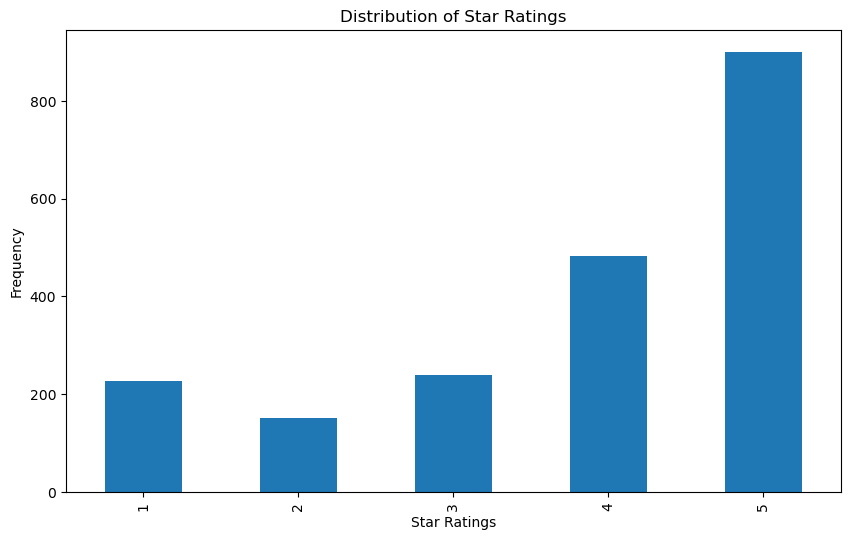

In [42]:
import matplotlib.pyplot as plt

# Bar Chart for Distribution of Ratings
plt.figure(figsize=(10, 6))
reviews['stars'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Star Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Star Ratings')
plt.show()

### Scatter Plot for Review Length vs Useful Votes

This plot is a scatter plot that visualizes the relationship between the length of reviews and the number of useful votes they receive. Each point represents a review, with its position determined by the review's length and the number of useful votes. This helps in identifying any patterns or correlations between these two variables.

- **plt.scatter(reviews['review_length'], reviews['useful'], alpha=0.5)**:
    - **plt.scatter()**: Creates a scatter plot.
    - **reviews['review_length']**: Specifies the x-axis data, which is the length of the reviews.
    - **reviews['useful']**: Specifies the y-axis data, which is the number of useful votes.
    - **alpha=0.5**: Sets the transparency level of the points to 0.5, making it easier to see overlapping points.

- **plt.xlabel('Review Length')**:
    - Sets the label for the x-axis to 'Review Length'.

- **plt.ylabel('Number of Useful Votes')**:
    - Sets the label for the y-axis to 'Number of Useful Votes'.

- **plt.title('Review Length vs Useful Votes')**:
    - Sets the title of the plot to 'Review Length vs Useful Votes'.

- **plt.show()**:
    - Displays the scatter plot.


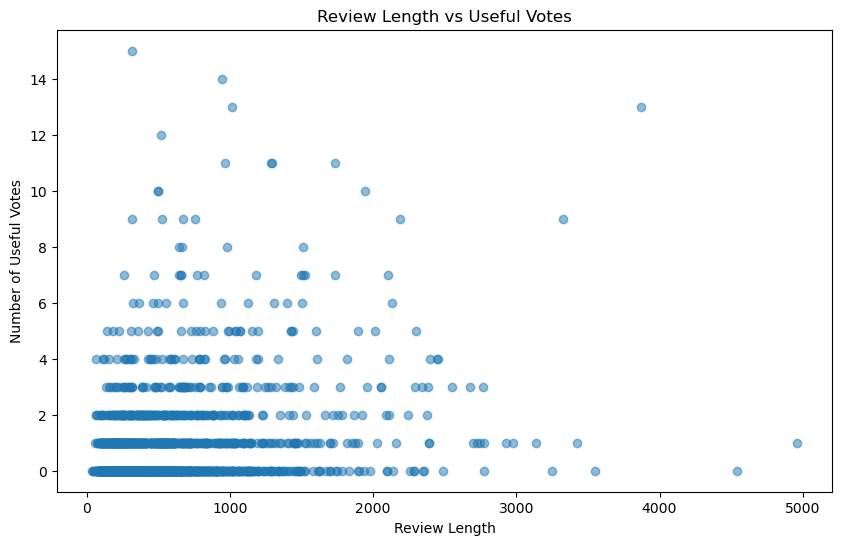

In [46]:
# Scatter Plot for Review Length vs Useful Votes
plt.figure(figsize=(10, 6))
plt.scatter(reviews['review_length'], reviews['useful'], alpha=0.5)
plt.xlabel('Review Length')
plt.ylabel('Number of Useful Votes')
plt.title('Review Length vs Useful Votes')
plt.show()

### Line Chart for Average Ratings Over Time
n
This plot is a line chart that visualizes the average star rating of reviews over time. It shows how the average rating has changed monthly, allowing for the identification of trends and patterns in customer satisfaction over the observed perioheight.

- **monthly_avg_rating.plot()**:
    - Plots the `monthly_avg_rat from the Data Analysis sectioning` Series, which contains the average star rating for each month, as a line chart.

- **plt.xlabel('Date')**:
    - Sets the label for the x-axis to 'Date'.

- **plt.ylabel('Average Star Rating')**:
    - Sets the label for the y-axis to 'Average Star Rating'.

- **plt.title('Average Star Rating Over Time')**:
    - Sets the title of the plot to 'Average Stasplays the line chart.


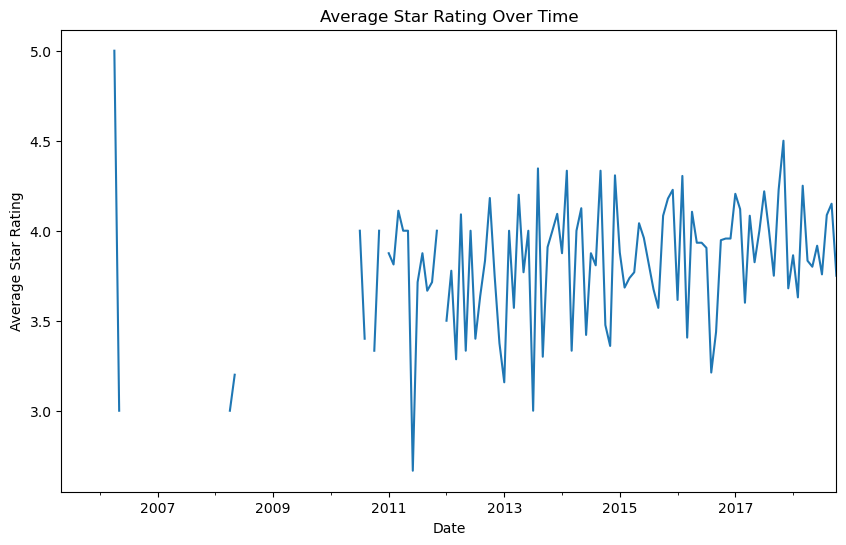

In [47]:
# Line Chart for Average Ratings Over Time
plt.figure(figsize=(10, 6))
monthly_avg_rating.plot()
plt.xlabel('Date')
plt.ylabel('Average Star Rating')
plt.title('Average Star Rating Over Time')
plt.show()

The breaks in the lines indicate that no data was available for these months.

### Pie Chart for Sentiment Distribution

This plot is a pie chart that visualizes the distribution of sentiment classifications (Positive, Negative, Neutral) in the Yelp reviews dataset. It shows the proportion of each sentiment category, providing insights into the overall sentiment of the reviews.

- **sentiment_counts = reviews['sentiment'].value_counts()**:
    - Counts the occurrences of each sentiment category in the 'sentiment' column of the DataFrame `reviews`, which we created in the Data Analysis section.
    - **sentiment_counts**: Stores the counts of each sentiment.

- **plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)**:
    - **plt.pie()**: Creates a pie chart.
    - **sentiment_counts**: Provides the data for the pie chart (the counts of each sentiment).
    - **labels=sentiment_counts.index**: Labels each slice of the pie chart with the sentiment categories.
    - **autopct='%1.1f%%'**: Displays the percentage of each slice with one decimal place.
    - **startangle=140**: Rotates the start of the pie chart to 140 degrees for better visual presentation.

- **plt.title('Sentiment Distribution of Reviews')**:
    - Sets the title of the plot to 'Sentiment Distribution of Reviews'.

- **plt.show()**:
    - Displays the pie chart.

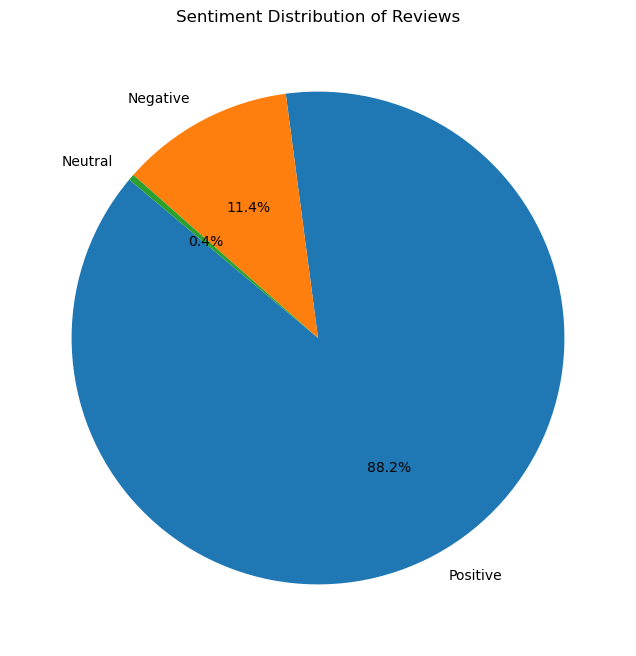

In [48]:
# Pie Chart for Sentiment Distribution
# Count the occurrences of each sentiment
sentiment_counts = reviews['sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Reviews')
plt.show()

### Heat Map for Numeric Columns

This plot is a heat map that visualizes the correlation between numeric columns in the Yelp reviews dataset. The heat map shows the strength and direction of the relationships between pairs of variables, helping to identify patterns and potential dependencies.

- **import seaborn as sns**:
    - Imports the `seaborn` library, which is used for creating advanced visualizations.

- **numeric_cols = ['stars', 'useful', 'funny', 'cool']**:
    - Defines a list of numeric columns that will be included in the heat map.

- **corr_matrix = df[numeric_cols].corr()**:
    - Computes the correlation matrix for the selected numeric columns.
    - **df[numeric_cols]**: Selects the specified numeric columns from the DataFrame `df`.
    - **corr()**: Calculates the pairwise correlation coefficients between the columns.

- **plt.figure(figsize=(10, 8))**:
    - Creates a new figure with a specified size of 10 inches in width and 8 inches in height.

- **sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')**:
    - **sns.heatmap()**: Plots the heat map.
    - **corr_matrix**: Provides the data for the heat map (the correlation matrix).
    - **annot=True**: Displays the correlation coefficients on the heat map.
    - **cmap='coolwarm'**: Uses the 'coolwarm' colormap for the heat map.
    - **fmt='.2f'**: Formats the correlation coefficients to two decimal places.

- **plt.title('Correlation Heatmap of Numeric Columns')**:
    - Sets the title of the plot to 'Correlation Heatmap of Numeric Columns'.

- **plt.show()**:
    - Displays the heat map.


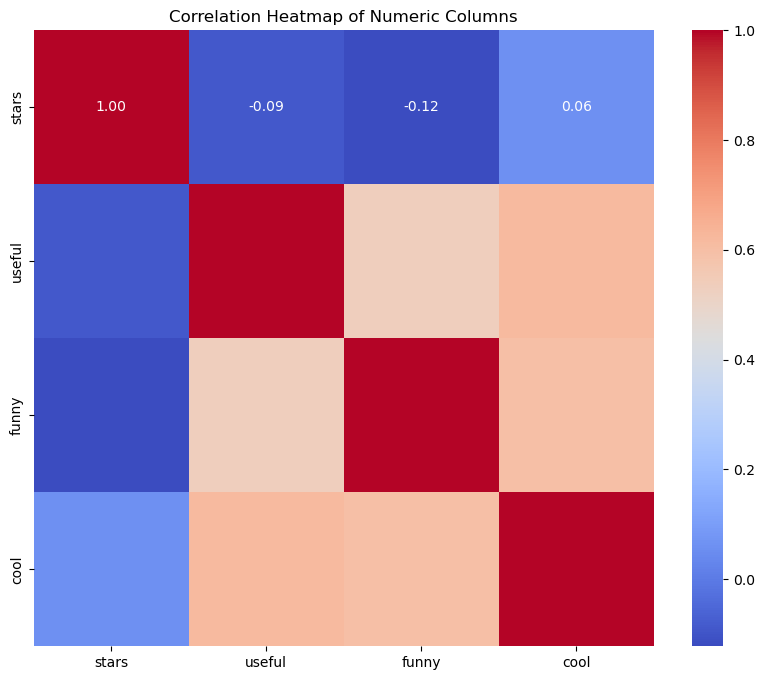

In [49]:
import seaborn as sns

# Heat Map for Numeric Columns
# Select numeric columns for the heat map
numeric_cols = ['stars', 'useful', 'funny', 'cool']

# Compute the correlation matrix
corr_matrix = reviews[numeric_cols].corr()

# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

## 5. Reflection Exercise

In this section, you will reflect on your learning experience and answer the following questions. Please provide your answers when prompted by the code.

### Questions:

1. **What specific data analysis technique or concept did you find most beneficial for your field, and how do you plan to apply it in a practical scenario related to your work or interests?**
2. **What was the most challenging aspect of the data analysis techniques you learned in this module, considering your background and experience? How did you overcome this challenge, and what resources or strategies did you find most helpful?**

Run the following two cells and input your answers in the text boxes that show up. Don't forget to press `Return` once you are done typing. In case you made a mistake or want to re-enter your answer, just run the corresponding cell again.

In [51]:
learning_insight = input("What specific data analysis technique or concept did you find most beneficial for your field, and how do you plan to apply it in a practical scenario related to your work or interests?")

What specific data analysis technique or concept did you find most beneficial for your field, and how do you plan to apply it in a practical scenario related to your work or interests? As a data analyst, I found the concept of time series analysis extremely beneficial. I plan to apply it to forecast sales trends for our quarterly business reports, helping our team make informed inventory decisions.


In [52]:
challenge_reflection = input("What was the most challenging aspect of the data analysis techniques you learned in this module, considering your background and experience? How did you overcome this challenge, and what resources or strategies did you find most helpful?")

What was the most challenging aspect of the data analysis techniques you learned in this module, considering your background and experience? How did you overcome this challenge, and what resources or strategies did you find most helpful? Given my background in marketing, I struggled with understanding statistical hypothesis testing. I overcame this by revisiting foundational statistics resources and practicing with real-world examples. The peer discussion forums and supplemental videos were particularly helpful.


Running the following cell is really important, as this will save the answers you gave above. In case you change your answers to any of the above questions, please be sure to run the following cell again, to save the updated answers.

You needn't be too concerned with what this code is really doing, but the crux is it is doing some string operations to convert your answers to a prompt, and then save that to a `.txt` file.

In [54]:
with open('..\Prompts\Assignment_2.txt', 'w') as file:
    file.write(learning_insight + '\n' + challenge_reflection)

## Summary
In this assignment, you have learned how to build a complete data analysis pipeline:
- Preprocess and clean data (handling missing values, removing duplicates, data type conversion).
- Wrangle data (merging CSV files, creating new columns).
- Perform data analysis (descriptive statistics, correlation analysis, grouping and aggregation, trend analysis, sentiment analysis).
- Create data visualizations (bar plots, box plots, scatter plots, line plots, pie charts, heatmaps).

These skills are crucial for effective data analysis and will help you in future assignments and real-world data science tasks.